In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/home/nikolai/PycharmProjects/venvs/dataSci/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Задание 13
# Решение гиперболического уравнения
## Параметры сетки и функции
Здесь задаются все требуемые при расчете параметры и функции.

In [85]:
N = 1000
h = 1/(N+1)
xnet = np.array([h*(i+1) for i in range(N)])

c = 1
nt = 2000
dt = h/c

u0 = np.sin(np.pi*xnet)

## КР
Здесь применятся явная конечноразностная схема

In [86]:
u = [u0]
for t in range(nt):
    u_nm1 = np.concatenate([[0], u[-1], [0]])
    u_n = u_nm1[2:]+u_nm1[:-2]-u[-2] if t>0 else (u_nm1[2:]+u_nm1[:-2])/2
    u.append(u_n)

In [87]:
cm = sns.color_palette()
def plot_solution(a=0):
    plt.plot(xnet, u[a], c=cm[0])
    plt.plot(xnet, u0*np.cos(np.pi*a*dt), '--', c=cm[4])
    plt.ylim(-1,1)
    plt.xlim(0,1)
    plt.xlabel('$x$')
    plt.ylabel('$u(x,t)$')
    plt.text(0.5-0.057, u[a][N//2]-0.05, 't = %.3f'% float(a*dt))
    plt.legend(['numerical', 'analytic'])

/home/nikolai/PycharmProjects/venvs/dataSci/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


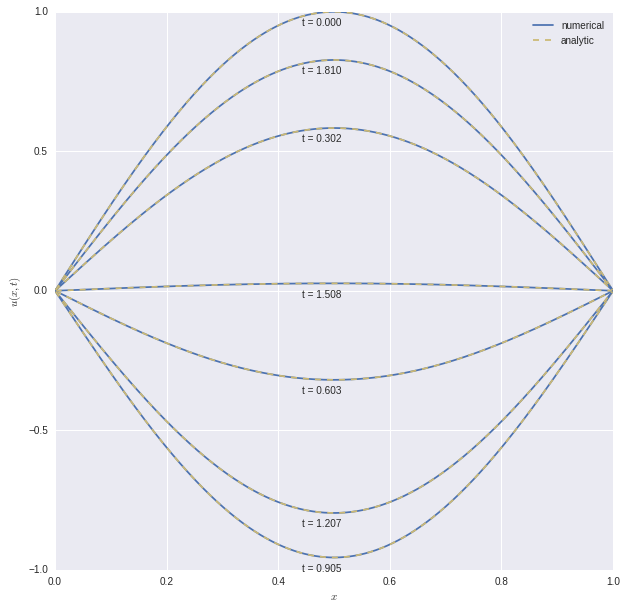

In [91]:
f = plt.figure(figsize=(10, 10))
for i in range(0, 2000, 302):
    plot_solution(i)

Видно что, как и ожидалось, численное решение совпало с аналитическим.